# Домашнее задание

Data contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
books = pd.read_csv('/content/drive/MyDrive/recsys-hw-data/BX-Books.csv')

<ipython-input-3-81e974c7dd81>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('/content/drive/MyDrive/recsys-hw-data/BX-Books.csv')


In [ ]:
interactions = pd.read_csv("/content/drive/MyDrive/recsys-hw-data/BX-Book-Ratings.csv", sep=";", encoding = "ISO-8859-1")

In [ ]:
interactions = interactions[interactions["Book-Rating"] != 0]

In [ ]:
interactions

,User-ID,ISBN,Book-Rating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
6,276736,3257224281,8
7,276737,0600570967,6
...,...,...,...
1149773,276704,0806917695,5
1149775,276704,1563526298,9
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [ ]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
books_meets = interactions.groupby("ISBN")["User-ID"].count().reset_index().rename(columns={"User-ID": "user_num"})

In [ ]:
user_meets = interactions.groupby("User-ID")["ISBN"].count().reset_index().rename(columns={"ISBN": "books_num"})

In [ ]:
interactions = interactions.merge(books_meets, on=["ISBN"]).merge(user_meets, on=["User-ID"])

In [ ]:
interactions = interactions[(interactions["user_num"] > 5) &
                            (interactions["books_num"] > 5) &
                            (interactions["books_num"] < 200)]

In [ ]:
users = pd.read_csv('/content/drive/MyDrive/recsys-hw-data/BX-Users.csv', delimiter=';', encoding = 'ISO-8859-1')

In [ ]:
users

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [ ]:
interactions = interactions.merge(books[["ISBN", "Image-URL-M", "Book-Title"]].rename(
    columns={"Image-URL-M": "picture_url"}), on=["ISBN"])

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [ ]:
interactions["product_id"] = le.fit_transform(interactions["ISBN"])
interactions["vid"] = le.fit_transform(interactions["User-ID"])

In [ ]:
interactions.head()

,User-ID,ISBN,Book-Rating,user_num,books_num,picture_url,Book-Title,product_id,vid
0,86583,3404139178,9,8,18,http://images.amazon.com/images/P/3404139178.0...,Das Lacheln der Fortuna: Historischer Roman,10397,3445
1,132500,3404139178,10,8,43,http://images.amazon.com/images/P/3404139178.0...,Das Lacheln der Fortuna: Historischer Roman,10397,5248
2,66483,3404139178,10,8,83,http://images.amazon.com/images/P/3404139178.0...,Das Lacheln der Fortuna: Historischer Roman,10397,2622
3,276866,3404139178,9,8,11,http://images.amazon.com/images/P/3404139178.0...,Das Lacheln der Fortuna: Historischer Roman,10397,10887
4,106534,3404139178,6,8,6,http://images.amazon.com/images/P/3404139178.0...,Das Lacheln der Fortuna: Historischer Roman,10397,4228


In [ ]:
from scipy.sparse import coo_matrix, csr_matrix

In [ ]:
csr_rates = coo_matrix((interactions["Book-Rating"], (interactions["vid"], interactions["product_id"])),
                            shape=(len(set(interactions["vid"])), len(set(interactions["product_id"]))))

### Ищем id нужных книг

In [ ]:
ids = [4233, 1921, 1264, 7216] # выбрала известны книги - Гарри Поттер, Властелин Колец, Маленький Принц, Оно

In [ ]:
for i, j in interactions[["product_id", "Book-Title"]].drop_duplicates().values:
    if "Harry Potter" in j:
        print("idx:", i, "\tBook Title:", j)

idx: 4233 	Book Title: Harry Potter and the Order of the Phoenix (Book 5)
idx: 7036 	Book Title: Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
idx: 4216 	Book Title: Harry Potter and the Chamber of Secrets (Book 2)
idx: 4226 	Book Title: Harry Potter and the Goblet of Fire (Book 4)
idx: 7035 	Book Title: Harry Potter and the Sorcerer's Stone (Book 1)
idx: 4238 	Book Title: Harry Potter and the Chamber of Secrets Postcard Book
idx: 4224 	Book Title: Harry Potter and the Prisoner of Azkaban (Book 3)
idx: 4227 	Book Title: Harry Potter and the Goblet of Fire (Book 4)
idx: 4217 	Book Title: Harry Potter and the Chamber of Secrets (Book 2)
idx: 4225 	Book Title: Harry Potter and the Prisoner of Azkaban (Book 3)
idx: 8836 	Book Title: The Sorcerer's Companion: A Guide to the Magical World of Harry Potter
idx: 9732 	Book Title: Ultimate Unofficial Guide to the Mysteries of Harry Potter
idx: 4234 	Book Title: Harry Potter and the Sorcerer's Stone (Book 1)
idx: 10280 	Book Ti

### Предобработка данных

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid", palette='magma')

Пропуски в геопозиции:

In [ ]:
users.Location.isna().any()

False

In [ ]:
users.Location.unique()

array(['nyc, new york, usa', 'stockton, california, usa',
       'moscow, yukon territory, russia', ...,
       'sergnano, lombardia, italy', 'stranraer, n/a, united kingdom',
       'tacoma, washington, united kingdom'], dtype=object)

Закодируем локации

In [ ]:
le = LabelEncoder()
users.Location = le.fit_transform(users.Location)

Почти у половины юзеров нет информации о возрасте:

In [ ]:
users.Age.isna().sum()

110762

In [ ]:
users.shape

(278858, 3)

In [ ]:
users.Age.drop_duplicates().values

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

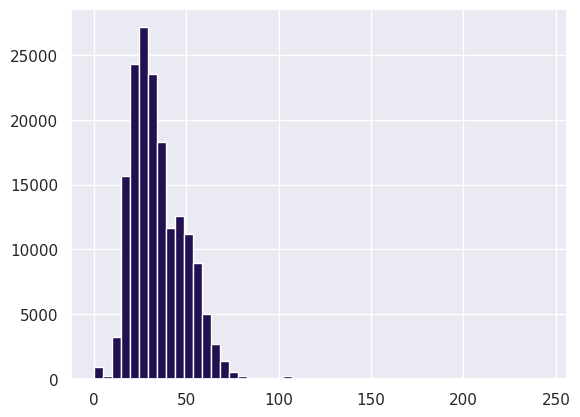

In [ ]:
plt.hist(users.Age.values, bins=50)

plt.show()

Мне не очень нравятся юзеры с слишком маленьким или большим возрастом, уберем все, что больше 99-го и меньше 1-го перцентиля

In [ ]:
percentile_99 = users.Age.quantile(0.99)
percentile_99

71.0

In [ ]:
percentile_1 = users.Age.quantile(0.01)
percentile_1

13.0

In [ ]:
users.drop(users.index[ users['Age'] > percentile_99], inplace=True)

In [ ]:
users.drop(users.index[ users['Age'] < percentile_1], inplace=True)

NaN'ы заполню средним по геопозиции или средним по всем юзерам, если у пользователя уникальная локация

In [ ]:
location_mean = users.groupby('Location')['Age'].transform('mean')
overall_mean = users['Age'].mean()
location_mean.fillna(overall_mean, inplace=True)

users['Age'] = users.apply(lambda row: int(location_mean[row.name]) if pd.isna(row['Age']) else int(row['Age']), axis=1)

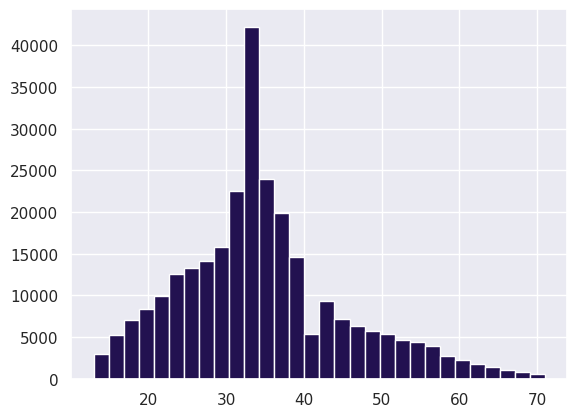

In [ ]:
plt.hist(users.Age.values, bins=30)

plt.show()

Получилось много пользователей с возрастом = среднее по всем юзерам, но что поделать

### 1. Реализовать персональный топ  - принимает на вход возраст и локацию, на выходе персональный топ   - 1 балл

Персональный топ - это топ товаров по похожим возрасту/интересам/локации. Как сделать? Разбить на сегменты по выбраным признакам. Топ делать по книгам с хорошим средним рейтингом.

In [ ]:
class PersonalTop():
    def __init__(self, users, interactions):
        self.users = users
        self.interactions = interactions
        self.picture_urls = dict()
        for book, url in interactions[['Book-Title', 'picture_url']].drop_duplicates().values:
            self.picture_urls[book] = url
        # у меня были какие-то беды с отображением картинок,
        # поэтому словарь с ссылками не пригодился и картинки я не отрисовываю :(

    def top_items(self, age, location, n=10):
        # вытаскиваем id-шники похожих пользователей
        other_users = self.users[self.users.Location == location]['User-ID'].tolist()
        other_users = np.union1d(other_users,
                                 self.users[np.abs(self.users.Age - age) <= 3]['User-ID'])
        # смотрим взаимодействие похожих пользователей с книгами
        chosen = self.interactions[self.interactions['User-ID'].isin(other_users)]
        # выделяем топ-n книг с рейтингом > 6
        average_ratings = None
        if chosen.shape[0] > 0: # если все ок и мы нашли похожих пользователей
            average_ratings = chosen.groupby('Book-Title')['Book-Rating'].mean()
        else: # если не нашли похожих пользователей
            average_ratings = self.interactions.groupby('Book-Title')['Book-Rating'].mean()
        n = min(n, average_ratings.size)
        top = average_ratings.sort_values(ascending=False).index.tolist()[:n]
        return top

In [ ]:
rec = PersonalTop(users, interactions)

In [ ]:
for id, location, age in users.values[:10]:
    top_rec = rec.top_items(age=age, location=location, n=5)
    print(f'user info:\nage: {age}, location: {location}\npersonal top:\n{", ".join(top_rec)}\n')

user info:
age: 31, location: 36772
personal top:
I Just Forgot (A Little Critter Book), Fischer TaschenbÃ?Â¼cher, Bd.26, SchÃ?Â¶ne neue Welt, Enders Game, Endlich Nichtleser: Die beste Methode, mit dem Lesen fÃ¼r immer aufzuhÃ¶ren (Suhrkamp Taschenbuch), Enemy Mind

user info:
age: 18, location: 48830
personal top:
stardust, If Only It Were True, Impulse, In Her Shoes : A Novel, In Sachen Signora Brunetti. Der achte Fall.

user info:
age: 55, location: 33483
personal top:
Summer Island, Second Nature, Death in Paradise, Rebecca's Tale, Reading Lolita in Tehran : A Memoir in Books

user info:
age: 17, location: 40562
personal top:
stardust, Wolf Shadow (Signet Historical Romance), Welcome to Dead House (Goosebumps, No 1), Nefer the Silent, The All-True Travels and Adventures of Lidie Newton

user info:
age: 34, location: 16902
personal top:
Dead Witch Walking, Pride and Prejudice (Penguin Popular Classics), The Forgetting Room: A Fiction (Byzantium Book), Traumreisende., Power (L.a. Co

### 2. На основе метода кластеризации похожих пользователей построить рекомендации (Слайд 27) - 3 балла

Нужно топ-10 рекомендаций с самой высокой оценкой. Считаем среднюю оценку для каждой книги по кластеру и выводим топ-10 книг.

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
class ClusterTop():
    def __init__(self, users, interactions, n_clusters=5):
        self.kmeans = KMeans(n_clusters=n_clusters,
                        random_state=42).fit(users[['Age', 'Location']].values)
        self.users = users.copy()
        self.users['cluster'] = self.kmeans.labels_
        self.interactions = pd.merge(interactions, self.users, on='User-ID')
        self.top10 = dict()
        for i in range(n_clusters):
            cluster = self.interactions[self.interactions.cluster == i]
            self.top10[i] = cluster.groupby('Book-Title')['Book-Rating'].mean().sort_values(ascending=False).index.tolist()[:10]

    def get_top10(self, user_age, user_loc):
        user_cluster = self.kmeans.predict([[user_age, user_loc]])[0]
        return self.top10[user_cluster]


In [ ]:
cl_top = ClusterTop(users, interactions, 10)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
for id, location, age in users.values[:10]:
    cluster_rec = cl_top.get_top10(age, location)
    print(f'user info:\nage: {age}, location: {le.inverse_transform([location])[0]}\ncluster top:\n{", ".join(cluster_rec)}\n')

user info:
age: 31, location: nyc, new york, usa
cluster top:
Swan Song, Dalva (Contemporary Classics (Washington Square Press)), Stuart Little, Strip City: A Stripper's Farewell Journey Across America, Crown Duel (Smith, Sherwood. Crown and Court Duet, Bk. 1-2.), Strata, Strapless (Red Dress Ink (Paperback)), Storming Heaven, Stones for Ibarra (Penguin Contemporary American Fiction Series), Stonebrook Cottage

user info:
age: 18, location: stockton, california, usa
cluster top:
The Adventures of Captain Underpants: An Epic Novel (Captain Underpants), He Did This Just For You, Heretics of Dune (Dune Chronicles, Book 5), Atlantis Found (Dirk Pitt Adventures (Hardcover)), Henry Huggins (50th Anniversary Edition), Heaven, Texas, Heat and Dust, The Red Tent : A Novel, Harry Potter und die Kammer des Schreckens, Herr Lehmann.

user info:
age: 55, location: moscow, yukon territory, russia
cluster top:
'Salem's Lot, Bet Me, Sacred, Salem's Lot, Dinner at the Homesick Restaurant : A Novel, The

### 3. Совстречаемость - 3 балла

В совстречаемости также учитывать оценки. Вес пары книг встретившихся у пользователя - полусумма их оценок.

In [ ]:
import tqdm

In [ ]:
class CoocurenceRecomendations():
    def __init__(self, Int):
        self.id_to_title = {}
        for id, name in Int[["product_id", "Book-Title"]].drop_duplicates().values:
            self.id_to_title[str(id)] = name
        self.interactions = Int

    def coocurrency_count(self):
        Int = self.interactions[["vid", "product_id", "Book-Rating"]].drop_duplicates()
        user_products = Int.groupby(["vid"])["product_id"].apply(list).reset_index()
        ratings = Int.groupby(["vid"])["Book-Rating"].apply(list)
        user_products['scores'] = ratings
        product_num = [len(i) for i in user_products["product_id"]]
        user_products["prod_num"] = product_num
        user_products = user_products[user_products["prod_num"] > 1]
        cooc = {}
        for i in tqdm.tqdm_notebook(user_products.values):
            for j in range(len(i[1])):
                for k in range(len(i[1])):
                    if j != k:
                        try:
                            cooc[str(i[1][j]) + "_" + str(i[1][k])] += (i[2][j] + i[2][k]) / 2
                        except:
                            cooc[str(i[1][j]) + "_" + str(i[1][k])] = (i[2][j] + i[2][k]) / 2
        cooc_list = []
        for i, j in cooc.items():
            cooc_list.append(i.split("_") + [j])
        self.cooc_rec = pd.DataFrame(cooc_list, columns=["item1", "item2", "measure"])

    def get_rec(self, i, show=False):
        recs = self.cooc_rec[self.cooc_rec["item1"] == str(i)]\
                            .sort_values("measure", ascending=False)\
                            .head(10)
        print(f"Для книги {self.id_to_title[str(i)]} рекомендуем:")
        for item1, item2, measure in recs.values:
            print(f'{self.id_to_title[item2]}, measure: {measure}')

In [ ]:
cooc_rec = CoocurenceRecomendations(interactions)
cooc_rec.coocurrency_count()

<ipython-input-44-de66bae609b0>:17: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm.tqdm_notebook(user_products.values):


  0%|          | 0/10012 [00:00<?, ?it/s]

In [ ]:
for id in ids:
    cooc_rec.get_rec(id)
    print('\n')

Для книги Harry Potter and the Order of the Phoenix (Book 5) рекомендуем:
Harry Potter and the Chamber of Secrets (Book 2), measure: 434.0
Harry Potter and the Prisoner of Azkaban (Book 3), measure: 418.5
Harry Potter and the Goblet of Fire (Book 4), measure: 405.0
Harry Potter and the Sorcerer's Stone (Book 1), measure: 321.0
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)), measure: 294.5
Harry Potter and the Goblet of Fire (Book 4), measure: 285.0
Harry Potter and the Prisoner of Azkaban (Book 3), measure: 210.0
Harry Potter and the Chamber of Secrets (Book 2), measure: 193.5
The Da Vinci Code, measure: 158.0
The Lovely Bones: A Novel, measure: 132.0


Для книги The Hobbit : The Enchanting Prelude to The Lord of the Rings рекомендуем:
The Fellowship of the Ring (The Lord of the Rings, Part 1), measure: 246.0
The Two Towers (The Lord of the Rings, Part 2), measure: 207.5
The Return of the King (The Lord of the Rings, Part 3), measure: 198.5
Harry Potter and the Sorcer

### 4. Коллаборативная фильтрация - 3 балла

Коллаборативную фильтрацию реализовывать как на слайде 51 презентации, посоветовав каждому пользователю топ-10 книг с самой высокой оценкой. Сделать рекомендации User-based и Item-based и сравнить.

Если совсем сложно - можно сделать как в семинарской части, поставив оценку "0", если рейтинг < 5 и "1" - в противном случае. Тогда максимум за это - 1 балл. Реализовать U2I и I2I рекомендации.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
class Colloborative():
    def __init__(self, Int):
        self.id_to_title = {}
        for id, name in Int[["product_id", "Book-Title"]].drop_duplicates().values:
            self.id_to_title[id] = name
        self.csr_rates = coo_matrix((interactions["Book-Rating"], (interactions["vid"], interactions["product_id"])),
                            shape=(len(set(interactions["vid"])), len(set(interactions["product_id"]))))

    def user_based(self, idx):
        user = self.csr_rates.getrow(idx).toarray()[0]
        cos_sim = cosine_similarity([user], self.csr_rates).reshape(-1, 1)
        dif = self.csr_rates - self.csr_rates.mean(axis=1)
        ratings = np.array(user.mean() + np.sum(np.multiply(dif, cos_sim), axis=0) / np.sum(cos_sim)).flatten()
        total_rate = (1 - user.astype(bool)) * ratings

        total_rec = np.argsort(total_rate)[::-1][:10]

        print('Для пользователя с оценками')
        for book_id in np.where(user !=0)[0]:
            print(f'Книга: {self.id_to_title[book_id]}, оценка: {user[book_id]}')
        print('рекомендуем книги')
        for i in range(len(total_rec)):
            print(f'{self.id_to_title[total_rec[i]]}, measure: {total_rate[total_rec[i]]}')

    def item_based(self, idx):
        item = self.csr_rates.getcol(idx).toarray().reshape(1, -1)
        cos_sim = cosine_similarity(item, self.csr_rates.T).reshape(-1, 1)
        dif = self.csr_rates - self.csr_rates.mean(axis=0)
        ratings = np.array(item.mean() + np.sum(np.multiply(dif.T, cos_sim), axis=1) / np.sum(cos_sim)).flatten()

        total_rate = np.argsort(ratings)[::-1][:10]

        print(f'Для книги: {self.id_to_title[idx]} рекомендуем похожие:')
        for id in total_rate:
            print(f'{self.id_to_title[id]}, measure: {ratings[id]}')

In [ ]:
col = Colloborative(interactions)

In [ ]:
col.user_based(100)

Для пользователя с оценками
Книга: Wolfwalker, оценка: 10
Книга: Damia (Ace Science Fiction), оценка: 10
Книга: She Who Remembers, оценка: 9
Книга: Voice of the Eagle, оценка: 9
Книга: The Door to December, оценка: 8
Книга: The Clan of the Cave Bear : a novel, оценка: 9
рекомендуем книги
The Lovely Bones: A Novel, measure: 0.8583467181615999
From the Corner of His Eye, measure: 0.5121456596914568
Valley of the Horses (Auel, Jean M. , Earth's Children.), measure: 0.49774665532679346
Where the Heart Is (Oprah's Book Club (Paperback)), measure: 0.46270369085517987
Divine Secrets of the Ya-Ya Sisterhood: A Novel, measure: 0.42361886414330296
When the Wind Blows, measure: 0.41659835059528344
Seize the Night, measure: 0.3988141157286055
Interview with the Vampire, measure: 0.39854743516923
The Partner, measure: 0.38217514872270036
The Da Vinci Code, measure: 0.37889391564929403


In [ ]:
for i in range(10):
    col.user_based(i)
    print('\n')

Для пользователя с оценками
Книга: Clara Callan, оценка: 5
рекомендуем книги
Outlander, measure: 1.9321981686844336
Big Stone Gap, measure: 1.7385963631322123
Daughter of Fortune: A Novel, measure: 1.235793293181684
The Pilot's Wife : A Novel, measure: 1.235793293181684
Prayer for Owen Meany, measure: 1.235793293181684
Chaos: Making a New Science, measure: 1.167582213616064
The No. 1 Ladies' Detective Agency (Today Show Book Club #8), measure: 1.167582213616064
Attack Of The Deranged Mutant Killer Snow Goons, measure: 1.167582213616064
The Flanders Panel, measure: 1.167582213616064
SHIPPING NEWS, measure: 1.167582213616064


Для пользователя с оценками
Книга: Fast Women, оценка: 8
Книга: Female Intelligence, оценка: 8
Книга: Pasquale's Nose: Idle Days in an Italian Town, оценка: 7
Книга: Rich Dad, Poor Dad: What the Rich Teach Their Kids About Money--That the Poor and Middle Class Do Not!, оценка: 10
Книга: The Pillars of the Earth, оценка: 3
рекомендуем книги
The Da Vinci Code, measur

сложно оценивать на глаз, но пользователю, который хорошо оценил книги по Гарри Поттеру, мы рекомендуем другие части Гарри Поттера, а это неплохо

In [ ]:
for id in ids:
    col.item_based(id)
    print('\n')

Для книги: Harry Potter and the Order of the Phoenix (Book 5) рекомендуем похожие:
Harry Potter and the Chamber of Secrets (Book 2), measure: 0.12235401459856102
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)), measure: 0.1223540145985608
Bridget Jones's Diary, measure: 0.12235401459855308
Harry Potter and the Chamber of Secrets (Book 2), measure: 0.12235401459855275
The Tale of the Body Thief (Vampire Chronicles (Paperback)), measure: 0.1223540145985515
Life of Pi, measure: 0.12235401459855033
The Return of the King (The Lord of the Rings, Part 3), measure: 0.12235401459854893
Prodigal Summer, measure: 0.12235401459854847
The Fellowship of the Ring (The Lord of the Rings, Part 1), measure: 0.12235401459854814
Harry Potter and the Chamber of Secrets Postcard Book, measure: 0.12235401459854721


Для книги: The Hobbit : The Enchanting Prelude to The Lord of the Rings рекомендуем похожие:
The Fellowship of the Ring (The Lord of the Rings, Part 1), measure: 0.0798357664234

опять же, по Гарри Поттеру рекомендуем Гарри Поттера, Властелина Колец - это неплохо

подозреваю, что моя реализация коллаборативной фильтрации не совсем корректна - средние берутся по всем значениям(в том числе нулевым, которые на самом деле не ноль), при вычитании средних нарушается разреженность матрицы(потому что вычитаем опять же из всех элементов) и тд. но сделать умнее и лучше не получилось, буду рада узнать, как эти операции произвести корректнее :)